在这一小节，你将会学习到：
1. 感知机-单层的神经网络结构
2. 如何训练一个最简单的感知机，模型是如何一步一步靠近正确答案的
3. 什么是感知机模型中的学习率$\eta$，这一参数有什么意义
4. 感知机和神经网络的关系，多层感知机MLP是什么？
   

# 1 神经网络的雏形-感知机
## 1.1 感知机的基本原理
我们先来讨论神经网络NN本身到底是什么，再拓展到多层神经网络和高级的神经网络模型；
实际上，最开始的神经网络模型实际上是一种线性模型，叫做感知机,感知机可以很简单的通过一个决策平面来分类数据；我们先通过一个判断猫和狗的例子来学习感知机的内容


我们做一个简单的二维数据集，其中x1代表身高，x2代表体重，并且我们的常识有，对于大部分的：
- 猫（Cat）：轻、矮
- 狗（Dog）：重、高
  
在不讨论数学之前，我们仅仅凭借直觉，来思考一个问题，如果现在出现了一个黑乎乎的动物，你无法从外观分辨猫和狗，仅知道身高和体重数据，你会怎么判断这个动物是猫还是狗？
有一种思路是，如果这个动物又重又高，这个动物就是狗，反之就是猫。
但我们又想到，大型的猫也有重的，而身高较高的猫却很少，因此我们在两个因素里加入一些权重，比如说虽然这个动物很轻，但是很高，那么我们仍然认为这是狗狗。

*不要小看这个非常日常的思考，这实际上就是感知机的全部原理->权重，分类*
这一原理完全来自于我们的日常生活，比如说，我明天想去健身房，但是又担心下雪。如果我是个超级热爱健身的人，那么不管下不下雪都会去（权重小），反之，我则是个更加看重天气舒适度的人。
作为一个绝对理性的人，或许可以这样做判断，想去健身的程度是0-1，天气良好的程度是0-1，如果加权大于1，权重是0.3和0.7。那么在一个我很想去健身（1），却下着鹅毛大雪的日子（0），最终得分只有0.3，没有超过我自己规定的阈值0.5.那么我就不去。

这一决策原理时常发生在日常决策中，只是我们生活中很少量化他们。
现在，我们继续通过猫和狗的例子来推演感知机的数学过程。

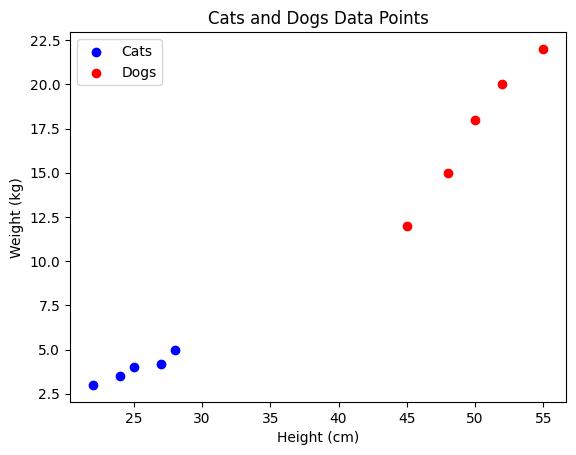

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 猫数据：矮 & 轻
cats = np.array([
    [22, 3],
    [25, 4],
    [28, 5],
    [24, 3.5],
    [27, 4.2]
])
cats_label = -np.ones(len(cats)) # 猫标签为 -1

# 狗数据：高 & 重
dogs = np.array([
    [45, 12],
    [50, 18],
    [55, 22],
    [48, 15],
    [52, 20]
])
dogs_label = np.ones(len(dogs)) # 狗标签为 1

X = np.vstack([cats, dogs])
Y = np.hstack([cats_label, dogs_label])

# 可视化数据点
plt.scatter(cats[:, 0], cats[:, 1], color='blue', label='Cats')
plt.scatter(dogs[:, 0], dogs[:, 1], color='red', label='Dogs')
plt.xlabel('Height (cm)')   
plt.ylabel('Weight (kg)')
plt.title('Cats and Dogs Data Points')
plt.legend()    
plt.show()

通过可视化我们可以直观地发现，猫和狗的数据点在二维空间中大致可以用一条直线分开（对应着我们的决策平面）。对于二维空间中的一条直线，其一般形式为：

$$
w_1 x_1 + w_2 x_2 + b = 0
$$

其中，$w_1$ 和 $w_2$ 分别为权重（斜率相关参数），$b$ 为偏置（截距），$(x_1, x_2)$ 为样本的特征（如身高和体重）。  
对于任意一个点 $(x_1, x_2)$：

- 如果 $w_1 x_1 + w_2 x_2 + b > 0$，则点在直线一侧（例如判为狗）；
- 如果 $w_1 x_1 + w_2 x_2 + b < 0$，则点在直线另一侧（例如判为猫）；
- 如果 $w_1 x_1 + w_2 x_2 + b = 0$，则点正好在直线上。

基于此，我们可以想到：
如果找到这样的一条直线，并将每个动物的“身高x1和体重x2代入上式——

- 若结果 < 0，则判定为猫
- 若结果 > 0，则判定为狗 
而这种“用一条直线分隔两类数据，并用其符号判断类别”的思想，就是感知机的核心数学原理。
具体地，感知机的输出可以写作：

$$
y = \text{sign}(w_1 x_1 + w_2 x_2 + b)
$$

其中 $\text{sign}(\cdot)$ 是符号函数（阶跃函数），即：

$$
\text{sign}(z) = 
\begin{cases}
1, & z \geq 0 \\
-1, & z < 0
\end{cases}
$$

这样，我们就可以根据 $y$ 的取值来判断样本属于哪一类。（即健身房决策为0.3的时候，我们要映射到一个去还是不去的二维空间，自然的映射到0-1）
# 1.2 推广到一般情况
通过以上的推导，我们发现，其实找这样的一个平面，就是在寻找合适的 $w$ 和 $b$ 的过程。对于二维数据来说，我们找的是一条直线，有两个权重 $w_1$ 和 $w_2$。对于更多维的数据来说，我们需要寻找 $w_1, w_2, \dots, w_n$ 共 $n$ 个权重，以及一个偏置 $b$。推广到 $n$ 维空间，感知机的决策函数可以写作：

$$
y = \text{sign}\left(\sum_{i=1}^n w_i x_i + b\right) = \text{sign}(\mathbf{w}^\top \mathbf{x} + b)\tag{1}
$$

其中：

- $\mathbf{x} = [x_1, x_2, \dots, x_n]^\top$ 为输入特征向量
- $\mathbf{w} = [w_1, w_2, \dots, w_n]^\top$ 为权重向量
- $b$ 为偏置项，b=-$\theta$,即负阈值，数学中所提较少，对应具体问题时才会提及阈值方便理解
- $\text{sign}(\cdot)$ 为符号函数

我们的目标就是通过训练数据，不断调整 $\mathbf{w}$ 和 $b$，使得决策平面能够正确分隔不同类别的数据点。

接下来我们通过代码演示，如何一步一步寻找合适的 $\mathbf{w}$ 和 $b$。

## 1.3 决策平面怎么找？
**最原始的感知机算法**
- 核心思想："错误驱动"。即先全错，再逐步用正确答案修正权重 $\mathbf{w}$ 和偏置 $b$，直到收敛

感知机的训练过程如下：

- 首先初始化权重 $\mathbf{w}$ 和偏置 $b$（可以为零或随机值）。
- 对于每个样本 $(\mathbf{x}, y)$，计算预测值 $y' = \text{sign}(\mathbf{w}^\top \mathbf{x} + b)$。
- 如果 $y' = y$（即分类正确），则不更新参数。
- 如果 $y' \neq y$（即分类错误），则按照如下规则更新参数：
  $$
  \mathbf{w} \leftarrow \mathbf{w} + \eta y \mathbf{x} \\
  b \leftarrow b + \eta y
  $$
  其中 $\eta$ 为学习率。决定模型每次更新参数时“走多大一步”
  - 太大容易跳来跳去，甚至错过能正确分割的直线
  - 太小就收敛的很慢

这种更新方式保证了每次分类错误时，$\mathbf{w}$ 和 $b$ 都会朝着正确分类的方向调整。例如：
- 如果 $y=1$（狗），但被分为 $-1$，则 $\mathbf{w}$ 会增加 $\eta \mathbf{x}$，使得 $\mathbf{w}^\top \mathbf{x} + b$ 更大，更容易被判为 1。（b的变化也同理）
- 如果 $y=-1$（猫），但被分为 $1$，则 $\mathbf{w}$ 会减少 $\eta \mathbf{x}$，使得 $\mathbf{w}^\top \mathbf{x} + b$ 更小，更容易被判为 -1。（b的变化也同理）

这样，经过多次迭代，参数会逐步收敛到能够正确分类训练样本的位置。

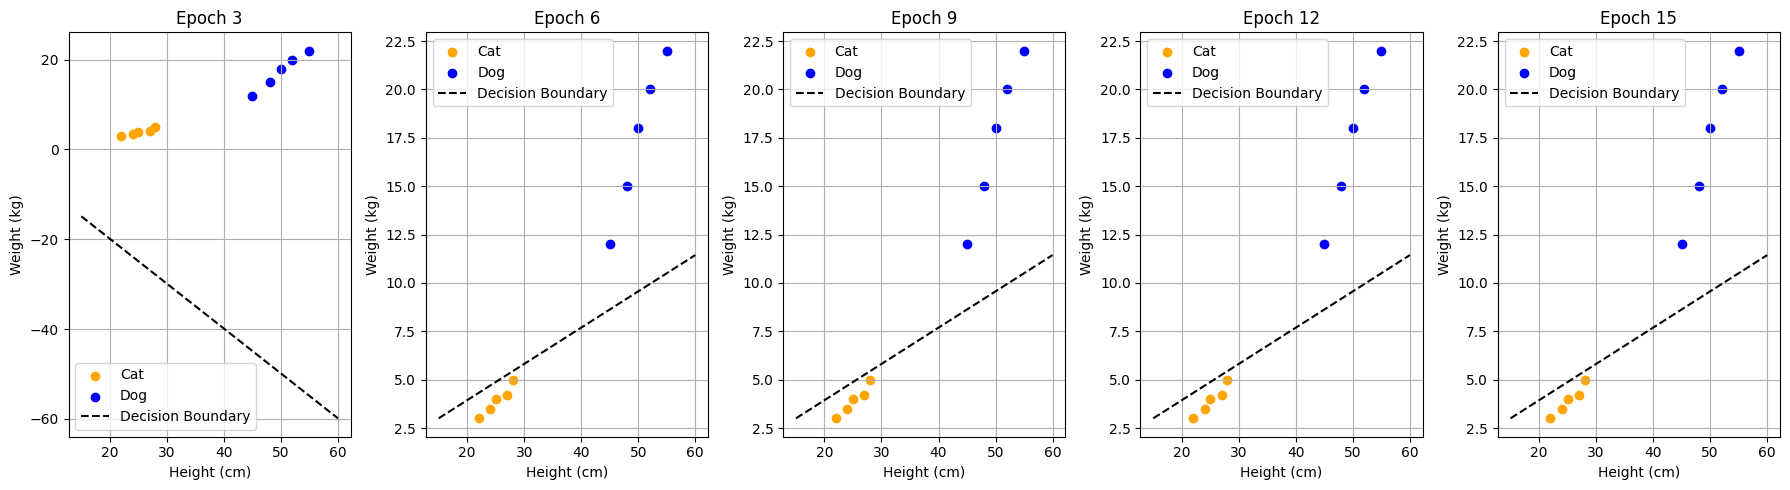

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(18, 5))

w = np.zeros(2)
b = 0
lr = 0.01

for epoch in range(15):
    for x, y in zip(X, Y):
        if y * (np.dot(w, x) + b) <= 0:
            w += lr * y * x
            b += lr * y
    # 每3个epoch画一次
    if (epoch + 1) % 3 == 0:
        idx = (epoch + 1) // 3 - 1
        if idx < len(axes):
            axes[idx].scatter(cats[:,0], cats[:,1], color='orange', label='Cat')
            axes[idx].scatter(dogs[:,0], dogs[:,1], color='blue', label='Dog')
            h = np.linspace(15, 60, 100)
            wgt = -(w[0] * h + b) / w[1]
            axes[idx].plot(h, wgt, 'k--', label='Decision Boundary')
            axes[idx].set_xlabel("Height (cm)")
            axes[idx].set_ylabel("Weight (kg)")
            axes[idx].set_title(f"Epoch {epoch+1}")
            axes[idx].legend()
            axes[idx].grid()

plt.tight_layout()
plt.show()


## 1.5总结和MLP的故事

以上其实就是最简单的感知机模型，是一种线性组合+Step函数组合而成，用于分类“二分类”任务的一种模型。
这其实是最初单个神经元的雏形，分别对应了x-input，y-output，还有step(wx+b)这样的中间层；
这一模型在上个世纪1957年被提出，但是后来并没有被人火热的关注。这是因为，在现实生活中，大部分的问题实际上是非线性的。

比如说一堆检验数据，正常的检验结果呈现在某个区间内聚集的效果，而病人的样本会在这个聚集圈外，那么这个决策边界应该是一个曲线或者圆形。如下图所示

因此是在1980s，诞生了多层感知机-MLP，也即现代神经网络的雏形。
事实上，MLP只是让多个直线组合成曲线，第一层产生一堆“线”，下一层把这些线组合起来，就能拼出任意复杂的曲线和形状。
这样就可以用线性的方法（第一层），却经过激活函数（对应第二层~第N层，也称作隐藏层），来实现各种曲线，形状的决策边界
也是在这一步，我们使用各种可导的激活函数（例如ReLU，Sigmoid等）替代了原先的Step function，又因为激活函数的可导性质，使得我们可以通过链式法则训练，即现在常说的Backpropagatipn反向传播。

在下一节02.多层感知机MLP，我们将会第一次真正认识现代神经网络



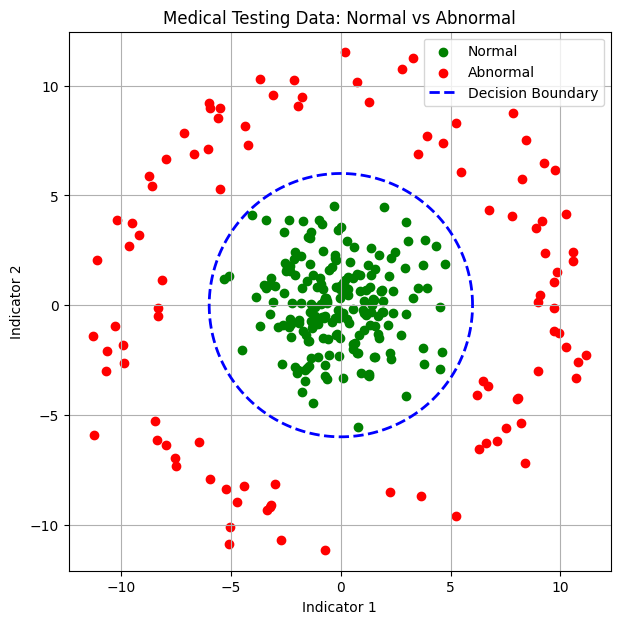

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 随机种子（可复现）
np.random.seed(0)

# --- 正常数据：中心高斯分布 ---
normal = np.random.randn(200, 2) * 2 + np.array([0, 0])

# --- 异常数据：在外圈 ---
# 思路：生成随机角度 + 大半径
angles = 2 * np.pi * np.random.rand(100)
radius = 10 + np.random.randn(100) * 1.0  # 半径约 10
abnormal = np.vstack([
    radius * np.cos(angles),
    radius * np.sin(angles)
]).T

# --- 决策边界（一个圆） ---
theta = np.linspace(0, 2 * np.pi, 200)
boundary_r = 6   # 决策边界半径
boundary_x = boundary_r * np.cos(theta)
boundary_y = boundary_r * np.sin(theta)

# --- 绘图 ---
plt.figure(figsize=(7, 7))

plt.scatter(normal[:, 0], normal[:, 1], color='green', label='Normal')
plt.scatter(abnormal[:, 0], abnormal[:, 1], color='red', label='Abnormal')

# 决策边界
plt.plot(boundary_x, boundary_y, 'b--', linewidth=2, label='Decision Boundary')

plt.title("Medical Testing Data: Normal vs Abnormal")
plt.xlabel("Indicator 1")
plt.ylabel("Indicator 2")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


# 附加内容1: 线性回归vs感知机
我在写感知机的内容的时候，总觉得跟线性回归有着千丝万缕的关系。因此这里我们区分一下：
  - 从目标来说，感知机是为了输出分类，线性回归是回归模型，输出的是连续数值
  - 从模型和训练算法来说，感知机用的是类似于反向传播的感知机训练算法，而线性回归使用的是最小二乘法，采用的损失函数是均方误差（MSE）
  - 虽然他们的基础模型都是求一个线性决策平面y=wx+b，但是感知机还经过了sign函数，变成了离散的标签

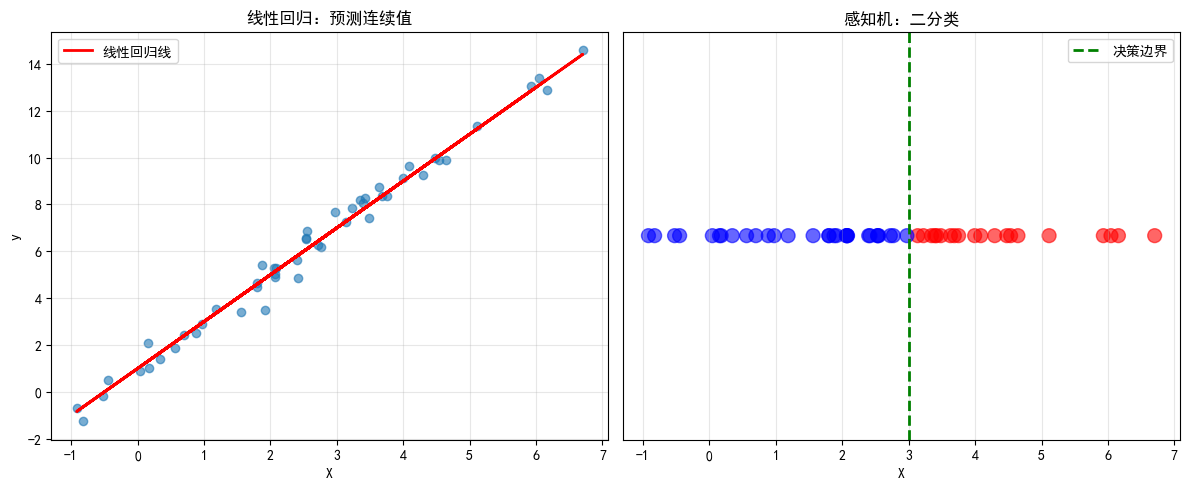

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']# 指定默认字体为支持中文的黑体（SimHei）


# 生成示例数据
np.random.seed(42)
X = np.random.randn(50, 1) * 2 + 3
y_reg = 2 * X + 1 + np.random.randn(50, 1) * 0.5  # 回归任务
y_cls = (X > 3).astype(int).ravel()  # 分类任务

plt.figure(figsize=(12, 5))

# 线性回归图
plt.subplot(1, 2, 1)
plt.scatter(X, y_reg, alpha=0.6)
plt.plot(X, 2*X + 1, 'r-', linewidth=2, label='线性回归线')
plt.title('线性回归：预测连续值')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# 感知机图
plt.subplot(1, 2, 2)
colors = ['blue' if y == 0 else 'red' for y in y_cls]
plt.scatter(X, [0]*len(X), c=colors, alpha=0.6, s=100)
plt.axvline(x=3, color='green', linestyle='--', linewidth=2, label='决策边界')
plt.title('感知机：二分类')
plt.xlabel('X')
plt.yticks([])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 附加内容2：logistic回归 vs 感知机
从本质上来说，logistics回归跟感知机更像一些，像是一个加强版的感知机，输出的是归属于某一个类别的概率

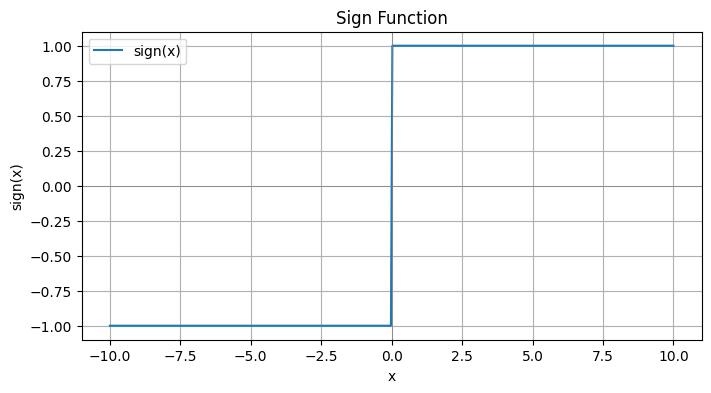

In [4]:
 # 画图示意sign函数
x = np.linspace(-10, 10, 400)
y = np.array([sign(xi) for xi in x])
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='sign(x)')
plt.title("Sign Function")
plt.xlabel("x")
plt.ylabel("sign(x)")   
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid()
plt.legend()
plt.show()
